# Linear Regression Fundamentals

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('./deeplearning.mplstyle')

A simple linear function

```math
y = mx + b
```

| Symbol | |
| --- | --- |
| y | Predicted value |
| m | Slope of coefecient of the linear expression |
| x | Feature |
| b | y-intercept when the line corsses the y axis |


In [16]:
x_train = np.array([[2], [4], [6], [8], [10]])
y_train = np.array([1, 3, 5, 7, 9])

In [17]:
def compute_model_output(x, m, b):
    """
    Computes the prediction of a linear model
    Args:
        x (ndarray (X,)): Data, X examples 
        m,b (scalar)    : model parameters  
    Returns
        f_wb (ndarray (y_pred,)): model prediction
    """
    X = x.shape[0]
    y_pred = np.zeros(X)
    for i in range(X):
        y_pred[i] = m * x[i].item() + b
    return y_pred

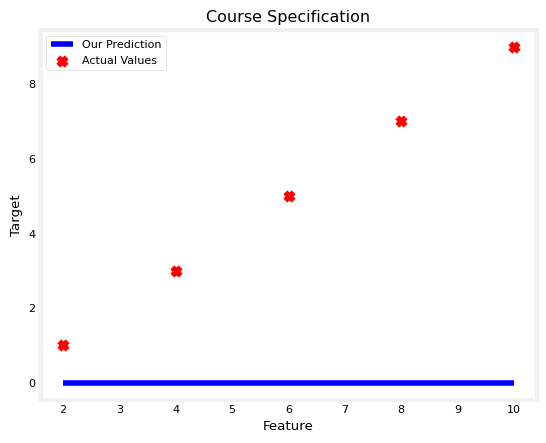

In [18]:
m = 0
b = 0

tmp_f_mb = compute_model_output(x_train, m, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_mb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Course Specification")
# Set the y-axis label
plt.ylabel('Target')
# Set the x-axis label
plt.xlabel('Feature')
plt.legend()
plt.show()

#### Fit, Good Fit, Underfit & Overfit (also called intuition)

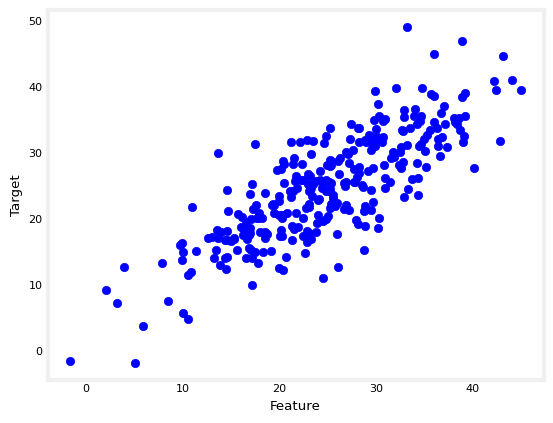

In [19]:
# Linear Relationship w Adjustable Correlation
correlation = 0.8       # Correlation between -1 and 1
n = 300                 # Sample

xx = np.array([0, 50])
yy = np.array([0, 50])
means = [xx.mean(), yy.mean()]  
stds = [xx.std() / 3, yy.std() / 3]

covs = [[stds[0]**2          , stds[0]*stds[1]*correlation], 
        [stds[0]*stds[1]*correlation,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, n).T
plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(m[0], m[1], color='blue')
plt.show()

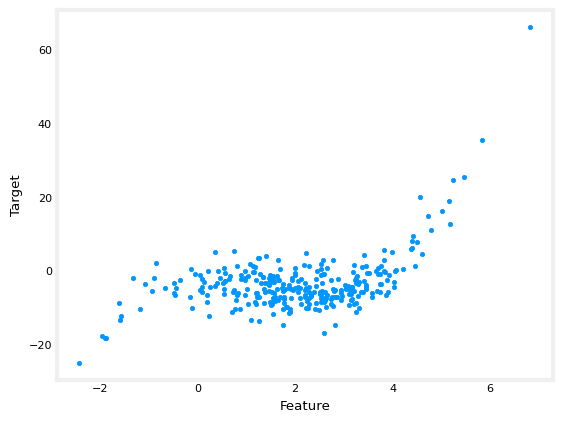

In [20]:
# Polynomial Linear Relationship
n = 300 # Sample
Beta = [0, 1, -2, 0.5]
e = np.random.normal(-3, 4, n)
X = 2 - 3 * np.random.normal(0, 0.5, n)
y = 0
for i in range(len(Beta)):
    y += Beta[i] * X**i
y += e

plt.xlabel("Feature")
plt.ylabel("Target")
plt.scatter(X, y, s=10)
plt.show()

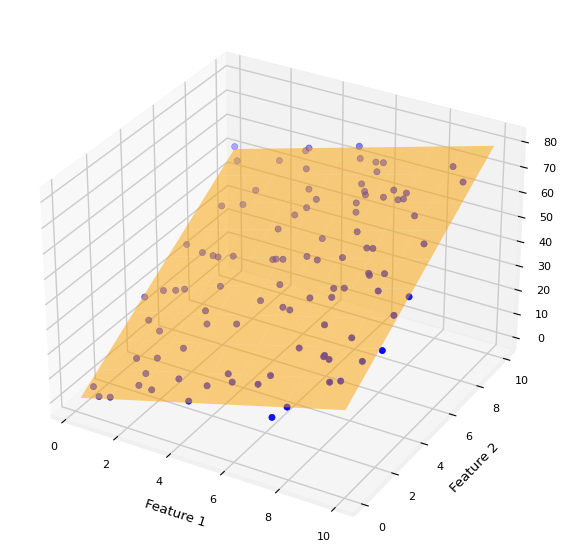

In [ ]:
n_samples = 100
X1 = np.random.rand(n_samples) * 10 
X2 = np.random.rand(n_samples) * 10 
y = 3 * X1 + 5 * X2 + np.random.randn(n_samples) * 2  

data = pd.DataFrame({'Feature1': X1, 'Feature2': X2, 'Target': y})
# Training a Linear Regression Model
model = LinearRegression()
X = data[['Feature1', 'Feature2']]
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_
# Creating a 3D graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Feature1'], data['Feature2'], data['Target'], color='blue')

x1_range = np.linspace(data['Feature1'].min(), data['Feature1'].max(), 10)
x2_range = np.linspace(data['Feature2'].min(), data['Feature2'].max(), 10)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)

y_pred = intercept + coefficients[0] * X1_grid + coefficients[1] * X2_grid

ax.plot_surface(X1_grid, X2_grid, y_pred, color='orange', alpha=0.5)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target')

plt.show()